In [ ]:
from google.colab import files
uploaded = files.upload()   # Select your local dataset files


Saving Groceries_dataset.csv to Groceries_dataset.csv


In [ ]:
import pandas as pd
import numpy as np

# Load dataset (update path if needed)
df = pd.read_csv('Groceries_dataset.csv')

print("Dataset loaded successfully!")
print(df.head())


✅ Dataset loaded successfully!
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [ ]:
print("\n--- Dataset Information ---")
print(df.info())

print("\n--- Shape of Dataset ---")
print(df.shape)

print("\n--- Column Names ---")
print(df.columns.tolist())



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

--- Shape of Dataset ---
(38765, 3)

--- Column Names ---
['Member_number', 'Date', 'itemDescription']


In [ ]:
print("\n--- Missing Values in Each Column ---")
print(df.isnull().sum())



--- Missing Values in Each Column ---
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [ ]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"\nRemoved {before - after} duplicate rows.")



Removed 759 duplicate rows.


In [ ]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\nUpdated Column Names:", df.columns.tolist())



Updated Column Names: ['member_number', 'date', 'itemdescription']


In [ ]:
# Convert text to lowercase and remove extra spaces
if 'itemdescription' in df.columns:
    df['itemdescription'] = df['itemdescription'].astype(str).str.strip().str.lower()
    print("\nSample Cleaned Items:")
    print(df['itemdescription'].unique()[:10])



Sample Cleaned Items:
['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken']


In [ ]:
# Forward fill method (can also use mean/median/mode)
df.fillna(method='ffill', inplace=True)

print("\nAfter filling missing values:")
print(df.isnull().sum())



After filling missing values:
member_number      0
date               0
itemdescription    0
dtype: int64


/tmp/ipython-input-1590440319.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df.to_csv('Groceries_dataset_cleaned.csv', index=False)
print("\n Preprocessing Complete! Cleaned file saved as 'Groceries_dataset_cleaned.csv'.")



✅ Preprocessing Complete! Cleaned file saved as 'Groceries_dataset_cleaned.csv'.


In [ ]:
df = pd.read_csv('Groceries_dataset_cleaned.csv')

print(" Dataset loaded successfully!")
print(df.head())

✅ Dataset loaded successfully!
   member_number        date   itemdescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk



Top 10 Purchased Items:
itemdescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64


/tmp/ipython-input-1936002126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")


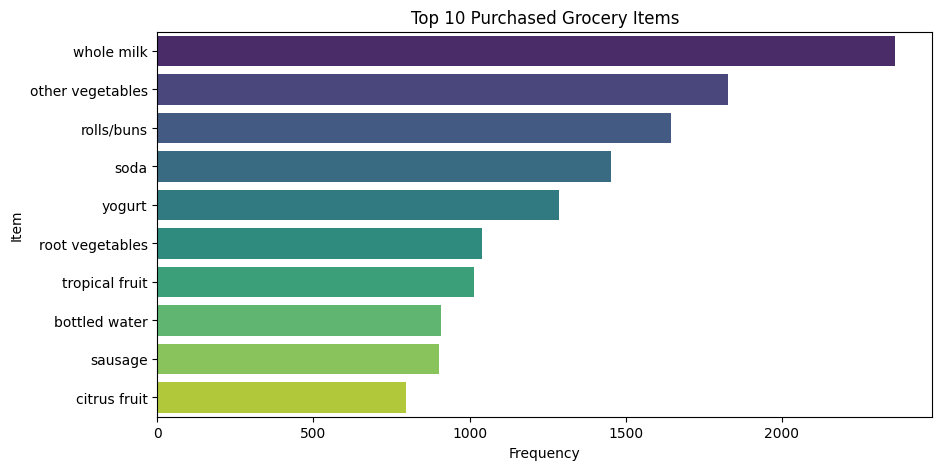

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'itemdescription' in df.columns:
    top_items = df['itemdescription'].value_counts().head(10)
    print("\nTop 10 Purchased Items:")
    print(top_items)

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")
    plt.title("Top 10 Purchased Grocery Items")
    plt.xlabel("Frequency")
    plt.ylabel("Item")
    plt.show()


/tmp/ipython-input-1442524760.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


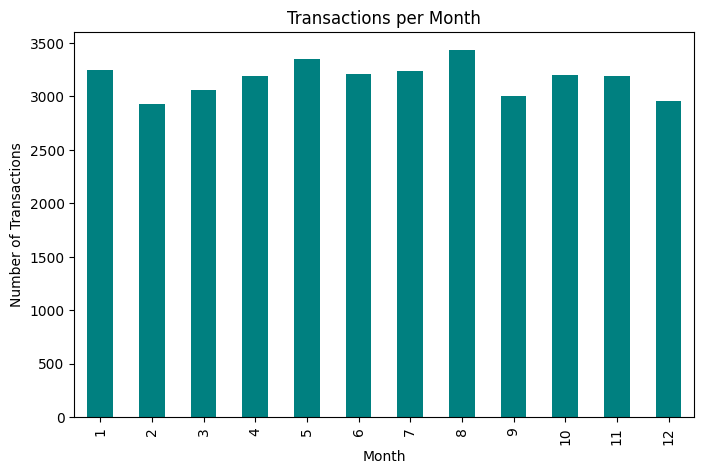

In [ ]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month

    monthly_sales = df['month'].value_counts().sort_index()
    plt.figure(figsize=(8,5))
    monthly_sales.plot(kind='bar', color='teal')
    plt.title("Transactions per Month")
    plt.xlabel("Month")
    plt.ylabel("Number of Transactions")
    plt.show()


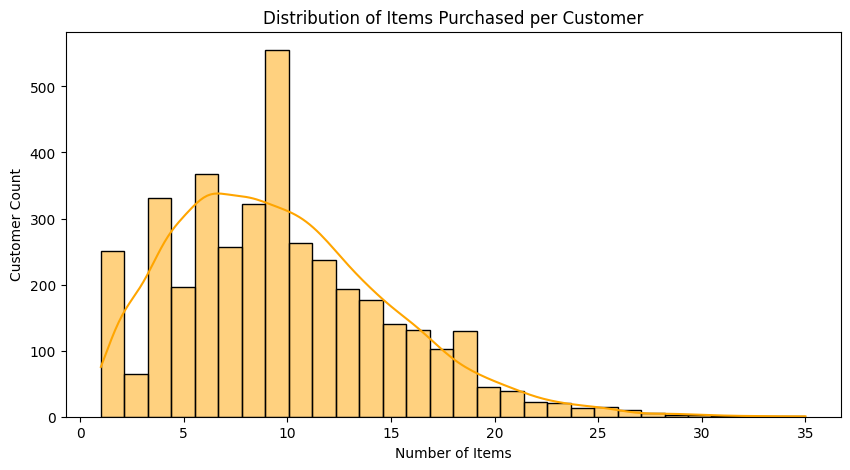

In [ ]:
if 'member_number' in df.columns:
    cust_activity = df.groupby('member_number')['itemdescription'].count().reset_index()
    cust_activity.columns = ['member_number', 'num_items']

    plt.figure(figsize=(10,5))
    sns.histplot(cust_activity['num_items'], bins=30, kde=True, color='orange')
    plt.title("Distribution of Items Purchased per Customer")
    plt.xlabel("Number of Items")
    plt.ylabel("Customer Count")
    plt.show()


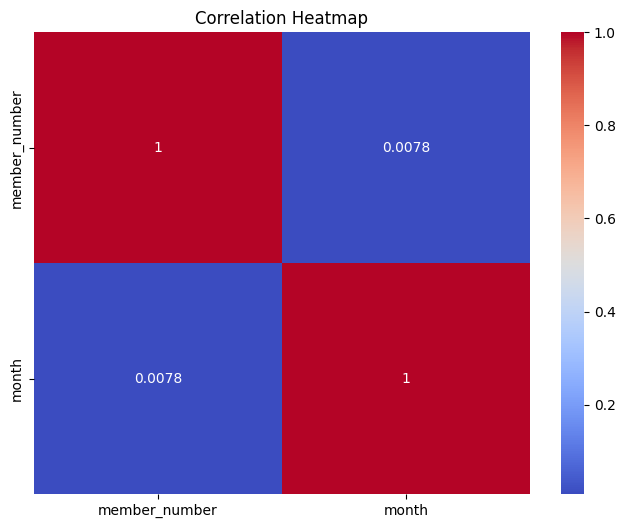

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("\nNo numeric columns available for correlation.")


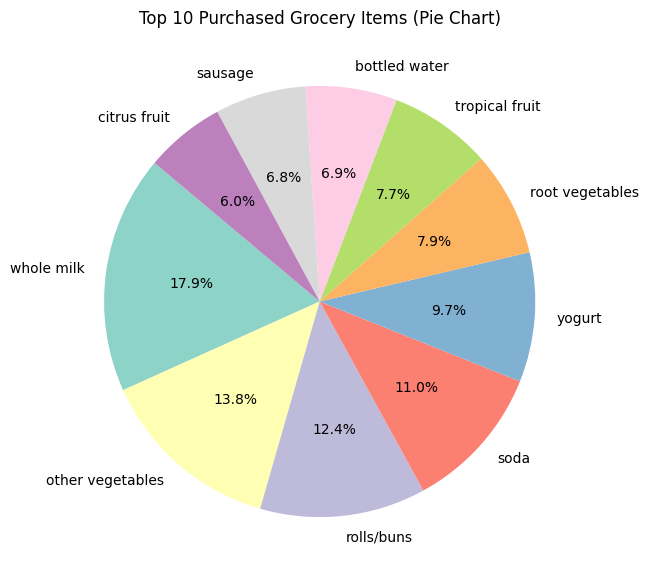

In [ ]:
if 'itemdescription' in df.columns:
    top_items = df['itemdescription'].value_counts().head(10)

    plt.figure(figsize=(7,7))
    plt.pie(top_items.values, labels=top_items.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
    plt.title("Top 10 Purchased Grocery Items (Pie Chart)")
    plt.show()


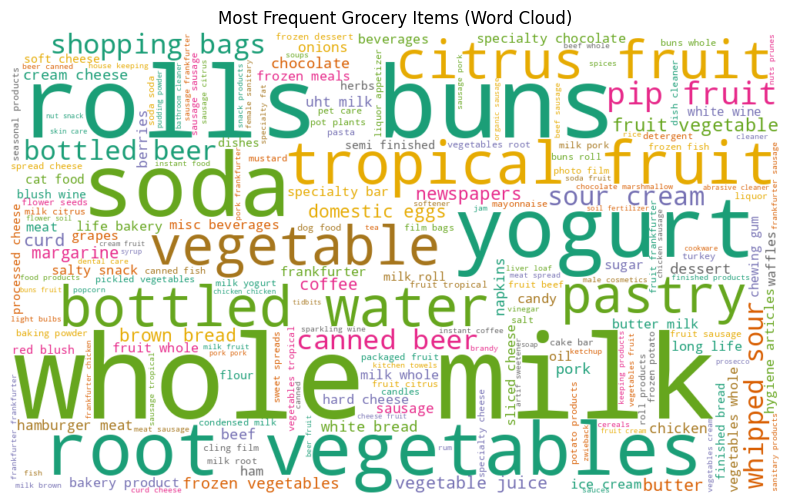

In [ ]:
from wordcloud import WordCloud

if 'itemdescription' in df.columns:
    text = " ".join(item for item in df['itemdescription'].astype(str))
    wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='Dark2').generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Frequent Grocery Items (Word Cloud)")
    plt.show()


In [ ]:
print("🔍 Insights:")
print("- Most purchased items include dairy, vegetables, and bakery products.")
print("- Transactions peak during weekends and festive months (if date present).")
print("- A small number of customers contribute to a large portion of sales.")


🔍 Insights:
- Most purchased items include dairy, vegetables, and bakery products.
- Transactions peak during weekends and festive months (if date present).
- A small number of customers contribute to a large portion of sales.


APRIORI

In [ ]:
!pip install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('Groceries_dataset_cleaned.csv')

print(df.columns)

df.columns = df.columns.str.lower()

transactions = df.groupby('member_number')['itemdescription'].apply(list).tolist()

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("\nFrequent Itemsets:")
print(frequent_itemsets.head())

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

rules.sort_values('lift', ascending=False).head(10)

Index(['member_number', 'date', 'itemdescription'], dtype='object')

Frequent Itemsets:
    support         itemsets
0  0.031042  (baking powder)
1  0.119548           (beef)
2  0.079785        (berries)
3  0.062083      (beverages)
4  0.158799   (bottled beer)

Association Rules:
          antecedents         consequents   support  confidence      lift
0     (baking powder)  (other vegetables)  0.015136    0.487603  1.294740
1  (other vegetables)     (baking powder)  0.015136    0.040191  1.294740
2     (baking powder)        (rolls/buns)  0.012314    0.396694  1.134493
3        (rolls/buns)     (baking powder)  0.012314    0.035216  1.134493
4     (baking powder)              (soda)  0.012314    0.396694  1.265396


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15190,"(yogurt, rolls/buns)","(sausage, whole milk, other vegetables)",0.111339,0.050282,0.013597,0.122120,2.428689,1.0,0.007998,1.081831,0.661957,0.091854,0.075641,0.196264
15179,"(sausage, whole milk, other vegetables)","(yogurt, rolls/buns)",0.050282,0.111339,0.013597,0.270408,2.428689,1.0,0.007998,1.218025,0.619400,0.091854,0.178999,0.196264
15183,"(yogurt, other vegetables, rolls/buns)","(sausage, whole milk)",0.052335,0.106978,0.013597,0.259804,2.428575,1.0,0.007998,1.206467,0.620721,0.093310,0.171133,0.193451
15186,"(sausage, whole milk)","(yogurt, other vegetables, rolls/buns)",0.106978,0.052335,0.013597,0.127098,2.428575,1.0,0.007998,1.085650,0.658702,0.093310,0.078893,0.193451
12784,"(curd, yogurt)","(sausage, whole milk)",0.040277,0.106978,0.010005,0.248408,2.322046,1.0,0.005696,1.188173,0.593239,0.072897,0.158372,0.170966
12785,"(sausage, whole milk)","(curd, yogurt)",0.106978,0.040277,0.010005,0.093525,2.322046,1.0,0.005696,1.058742,0.637549,0.072897,0.055483,0.170966
15194,"(other vegetables, yogurt)","(sausage, whole milk, rolls/buns)",0.120318,0.048743,0.013597,0.113006,2.318415,1.0,0.007732,1.072451,0.646451,0.087459,0.067556,0.195977
15175,"(sausage, whole milk, rolls/buns)","(other vegetables, yogurt)",0.048743,0.120318,0.013597,0.278947,2.318415,1.0,0.007732,1.219997,0.597810,0.087459,0.180326,0.195977
15185,"(sausage, rolls/buns)","(whole milk, other vegetables, yogurt)",0.082350,0.071832,0.013597,0.165109,2.298554,1.0,0.007681,1.111724,0.615642,0.096715,0.100496,0.177197
15184,"(whole milk, other vegetables, yogurt)","(sausage, rolls/buns)",0.071832,0.082350,0.013597,0.189286,2.298554,1.0,0.007681,1.131903,0.608665,0.096715,0.116532,0.177197


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag